In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 30.7 MB/s 
     |████████████████████████████████| 212 kB 73.6 MB/s 
     |████████████████████████████████| 141 kB 69.2 MB/s 
     |████████████████████████████████| 101 kB 12.5 MB/s 
     |████████████████████████████████| 596 kB 63.2 MB/s 
     |████████████████████████████████| 127 kB 73.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 w

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 30.3 MB/s 
     |████████████████████████████████| 6.6 MB 46.6 MB/s 


In [ ]:
from datasets import load_dataset
ds=load_dataset('ethos','binary', split='train')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/998 [00:00<?, ? examples/s]

Dataset ethos downloaded and prepared to /root/.cache/huggingface/datasets/ethos/binary/1.0.0/898d3d005459ee3ff80dbeec2f169c6b7ea13de31a08458193e27dec3dd9ae38. Subsequent calls will reuse this data.


In [ ]:
print(ds)

Dataset({
    features: ['text', 'label'],
    num_rows: 998
})


In [ ]:
import pandas as pd
df=ds.to_pandas()

In [ ]:
print(df)

                                                  text  label
0            You should know women's sports are a joke      1
1      You look like Sloth with deeper Down’s syndrome      1
2    You look like Russian and speak like Indian. B...      1
3                 Women deserve to be abused, I guess.      1
4    Women are made for making babies and cooking d...      1
..                                                 ...    ...
993   From the midnight sun where the hot springs blow      0
994                        Don't say I'm not your type      0
995   And therefore never send to know for whom the...      0
996                      And I can't stand another day      0
997   All values, unless otherwise stated, are in U...      0

[998 rows x 2 columns]


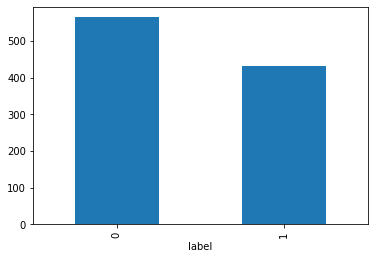

In [ ]:
#df.groupby(['label']).size().plot.bar()


In [ ]:
df.label

0      1
1      1
2      1
3      1
4      1
      ..
993    0
994    0
995    0
996    0
997    0
Name: label, Length: 998, dtype: int64

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer



tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

class mydataset(torch.utils.data.Dataset):

  def __init__(self, df):
    #self.df=df
    #self.labels=df.label
    self.labels=[x for x in df['label']]
    #self.texts=df.text
    self.texts=[tokenizer(x,padding='max_length', max_length = 10, 
                       truncation=True, return_tensors="pt") for x in df['text']]

  def __len__(self):
     return len(self.labels)

  #def __getitemm__(self, i):
   # return self.texts[i] , self.labels[i]  

  #def gettextt(self):
    #return   self.texts

  def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

  def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]  

  def __getitem__(self, i):
        batch_texts = self.get_batch_texts(i)
        batch_y = self.get_batch_labels(i)

        return batch_texts, batch_y



In [ ]:
tokenizer2 = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'I will watch Memento tonight'
bert_input = tokenizer2(example_text,padding='max_length', max_length = 10, 
                       truncation=True, return_tensors="pt")

print(bert_input)

{'input_ids': tensor([[  101,   146,  1209,  2824,  2508, 26173,  3568,   102,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}


In [ ]:
z=mydataset(df)

In [ ]:
print(df.text)

0              You should know women's sports are a joke
1        You look like Sloth with deeper Down’s syndrome
2      You look like Russian and speak like Indian. B...
3                   Women deserve to be abused, I guess.
4      Women are made for making babies and cooking d...
                             ...                        
993     From the midnight sun where the hot springs blow
994                          Don't say I'm not your type
995     And therefore never send to know for whom the...
996                        And I can't stand another day
997     All values, unless otherwise stated, are in U...
Name: text, Length: 998, dtype: object


In [ ]:
print(z.texts)
#print(z.lenn)

[{'input_ids': tensor([[ 101, 1192, 1431, 1221, 1535,  112,  188, 2865, 1132,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}, {'input_ids': tensor([[ 101, 1192, 1440, 1176,  156, 7841, 1324, 1114, 6353,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}, {'input_ids': tensor([[ 101, 1192, 1440, 1176, 1938, 1105, 2936, 1176, 1890,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}, {'input_ids': tensor([[  101,  2453, 10026,  1106,  1129, 18400,   117,   146,  3319,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}, {'input_ids': tensor([[  101,  2453,  1132,  1189,  1111,  1543, 12237,  1105,  8739,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'atte

In [ ]:
#print(z.df)
print(z.__getitemm__(997))

({'input_ids': tensor([[ 101, 1398, 4718,  117, 4895, 4303, 2202,  117, 1132,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}, 0)


In [ ]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

798 100 100


In [ ]:
#test my own network
from torch import nn
import torch.nn.functional as F

class net1(nn.Module):

  def __init__(self):
    super().__init__()
    self.hidd=nn.Linear(700,200)
    self.output=nn.Linear(200,10)
    #self.sigmoid=nn.Sigmoid()
    #self.softmax=nn.Softmax()

  def forward(self, x):
    x=F.sigmoid(self.hidd(x))
    #x= self.sigmoid(x)
    x=F.softmax(self.output(x))
    #x=self.softmax(x)





In [ ]:
m=net1()
x=torch.rand(700)
m.forward(x)



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
x

tensor([7.4189e-01, 3.5203e-01, 2.4174e-01, 7.6577e-01, 6.6277e-01, 9.9385e-01,
        1.1618e-01, 1.3213e-01, 8.5231e-02, 9.8980e-01, 8.3274e-01, 9.3310e-01,
        3.6933e-01, 8.4329e-02, 3.9514e-01, 3.6709e-01, 9.9229e-01, 1.0525e-01,
        1.0818e-01, 1.5577e-01, 6.8572e-01, 6.4526e-01, 4.7008e-01, 9.2970e-01,
        7.6763e-01, 6.1580e-01, 6.6481e-03, 6.3825e-01, 1.1450e-02, 8.6737e-01,
        4.0674e-01, 7.5661e-01, 3.4213e-03, 3.5561e-01, 1.0990e-01, 3.8318e-01,
        8.1378e-01, 5.3318e-01, 7.7701e-01, 9.8400e-01, 7.8267e-01, 9.0364e-01,
        8.7205e-01, 9.0656e-01, 4.3651e-01, 3.3503e-01, 7.8938e-01, 8.3494e-01,
        3.9625e-01, 4.8723e-01, 5.0325e-01, 5.8599e-01, 6.0735e-01, 4.1109e-01,
        2.7469e-01, 8.9685e-01, 2.1893e-01, 1.8919e-01, 7.2960e-01, 2.0473e-01,
        3.7603e-02, 2.4332e-01, 9.1422e-01, 1.6636e-01, 8.1744e-01, 3.1510e-01,
        8.6532e-01, 2.8492e-01, 1.9633e-01, 5.1482e-01, 9.1653e-01, 7.0077e-01,
        5.3316e-01, 1.5735e-01, 1.0431e-

In [ ]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
#training fun
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = mydataset(train_data), mydataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  


In [ ]:
#training
EPOCHS = 10
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 399/399 [00:26<00:00, 15.01it/s]


Epochs: 1 | Train Loss:  0.740                 | Train Accuracy:  0.427                 | Val Loss:  0.672                 | Val Accuracy:  0.570


100%|██████████| 399/399 [00:26<00:00, 14.85it/s]


Epochs: 2 | Train Loss:  0.623                 | Train Accuracy:  0.546                 | Val Loss:  0.526                 | Val Accuracy:  0.600


100%|██████████| 399/399 [00:26<00:00, 15.07it/s]


Epochs: 3 | Train Loss:  0.487                 | Train Accuracy:  0.662                 | Val Loss:  0.472                 | Val Accuracy:  0.600


100%|██████████| 399/399 [00:26<00:00, 14.81it/s]


Epochs: 4 | Train Loss:  0.397                 | Train Accuracy:  0.746                 | Val Loss:  0.434                 | Val Accuracy:  0.650


100%|██████████| 399/399 [00:26<00:00, 15.05it/s]


Epochs: 5 | Train Loss:  0.316                 | Train Accuracy:  0.861                 | Val Loss:  0.423                 | Val Accuracy:  0.610


100%|██████████| 399/399 [00:26<00:00, 15.09it/s]


Epochs: 6 | Train Loss:  0.254                 | Train Accuracy:  0.927                 | Val Loss:  0.441                 | Val Accuracy:  0.600


100%|██████████| 399/399 [00:26<00:00, 14.79it/s]


Epochs: 7 | Train Loss:  0.196                 | Train Accuracy:  0.961                 | Val Loss:  0.437                 | Val Accuracy:  0.600


100%|██████████| 399/399 [00:26<00:00, 15.04it/s]


Epochs: 8 | Train Loss:  0.156                 | Train Accuracy:  0.980                 | Val Loss:  0.428                 | Val Accuracy:  0.610


100%|██████████| 399/399 [00:26<00:00, 14.86it/s]


Epochs: 9 | Train Loss:  0.128                 | Train Accuracy:  0.991                 | Val Loss:  0.405                 | Val Accuracy:  0.670


100%|██████████| 399/399 [00:26<00:00, 15.05it/s]


Epochs: 10 | Train Loss:  0.104                 | Train Accuracy:  0.995                 | Val Loss:  0.401                 | Val Accuracy:  0.660


In [ ]:
def evaluate(model, test_data):

    test = mydataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    


In [ ]:
evaluate(model, df_test)

Test Accuracy:  0.630
